In [5]:
import datetime
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
  except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
    print(e)

# 레이블인코딩

### 데이터 전처리

In [7]:
# 데이터 불러오기
past_sales = pd.read_csv('C:/Users/PC/표/수요예측/rossmann-store-sales/train.csv')
store = pd.read_csv('C:/Users/PC/표/수요예측/rossmann-store-sales/store.csv')

# 데이터 제거
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1)

# 데이터 병합
data = pd.merge(left = past_sales,right = store, on = 'Store', how = 'right')

# 날짜
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")
data['Month']=pd.DatetimeIndex(data.Date).month
data['Day']=pd.DatetimeIndex(data.Date).day
data = data.drop(['Date'],axis=1)

# StateHoliday
data['StateHoliday'] = data['StateHoliday'].replace({0:'d'}) # 0 값은 d로 대체
data['StateHoliday'] = data['StateHoliday'].replace({'0':'d'})# 0 값은 d로 대체


# 결측값 처리
data = data.dropna(axis=0)

# store 이름 제거
data = data.drop(['Store'],axis=1)

# 데이터 분리(수치형, 범주형)
digital_cols = ['Sales', 'Customers', 'CompetitionDistance', 'Month', 'Day']
digital_data = data[digital_cols]
digital_data = pd.DataFrame(digital_data.values, columns = digital_cols)

categorey_clos = data.columns.drop(digital_cols)
categorey_data = data[categorey_clos]
categorey_data = pd.DataFrame(categorey_data.values, columns = categorey_clos)

# 인코딩
le = LabelEncoder()

le.fit(categorey_data.StateHoliday)
StateHoliday = le.transform(categorey_data.StateHoliday)
categorey_data['StateHoliday'] = StateHoliday

le.fit(categorey_data.StoreType)
StoreType = le.transform(categorey_data.StoreType)
categorey_data['StoreType'] = StoreType

le.fit(categorey_data.Assortment)
Assortment = le.transform(categorey_data.Assortment)
categorey_data['Assortment'] = Assortment

# 데이터 병합
data = pd.concat([digital_data, categorey_data], axis = 1)

# 표준화
scaler = StandardScaler().fit(data)
data = pd.DataFrame(scaler.transform(data),index = data.index, columns = data.columns)

pd.options.display.max_columns = None

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
data

,Sales,Customers,CompetitionDistance,Month,Day,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2
0,-0.133481,-0.169168,-0.539198,0.346614,1.740763,0.501485,0.452387,1.273232,0.170465,2.144089,0.582124,-0.941531,-1.002243
1,-0.196581,-0.188537,-0.539198,0.346614,1.626967,0.000831,0.452387,1.273232,0.170465,2.144089,0.582124,-0.941531,-1.002243
2,-0.258383,-0.238037,-0.539198,0.346614,1.513171,-0.499822,0.452387,1.273232,0.170465,2.144089,0.582124,-0.941531,-1.002243
3,-0.198918,-0.158407,-0.539198,0.346614,1.399374,-1.000475,0.452387,1.273232,0.170465,2.144089,0.582124,-0.941531,-1.002243
4,0.084382,-0.046494,-0.539198,0.346614,1.285578,-1.501129,0.452387,1.273232,0.170465,2.144089,0.582124,-0.941531,-1.002243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014562,-0.261239,-0.634036,-0.010380,-1.457264,-1.217938,1.002138,0.452387,-0.785403,0.170465,2.144089,1.314894,1.070891,0.997762
1014563,-0.321223,-0.662014,-0.010380,-1.457264,-1.331734,0.501485,0.452387,-0.785403,0.170465,2.144089,1.314894,1.070891,0.997762
1014564,-0.384323,-0.717970,-0.010380,-1.457264,-1.445531,0.000831,0.452387,-0.785403,0.170465,2.144089,1.314894,1.070891,0.997762
1014565,-0.540124,-0.707209,-0.010380,-1.457264,-1.559327,-0.499822,0.452387,-0.785403,0.170465,2.144089,1.314894,1.070891,0.997762


In [12]:
target_col = 'Sales'
features_cols = data.columns.drop(target_col)        
features = data[features_cols]
target = data[target_col]
target = pd.DataFrame(target.values.reshape(-1,1))
features = features.values
target = target.values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.4, shuffle=False)
x_test,x_valid,y_test,y_valid = train_test_split(x_test, y_test, test_size=0.5, shuffle=False)

In [10]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_valid = x_valid.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_valid = y_valid.astype(np.float32)

In [11]:
print('train_data의 row : %s, column : %s'%(x_train.shape[0],x_train.shape[1]))
print('test_data의 row : %s, column : %s'%(x_test.shape[0],x_test.shape[1]))
print('val_data의 row : %s, column : %s'%(x_valid.shape[0],x_valid.shape[1]))

train_data의 row : 811653, column : 12
test_data의 row : 101457, column : 12
val_data의 row : 101457, column : 12


### 학습

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256,input_dim = x_train.shape[1],activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(256,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(256,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
             loss='mse',
             metrics=['mean_absolute_error'])

model_path = 'C:/project/rossmann-store-sales'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=model_path , monitor='val_mean_absolute_error', verbose=1, save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=6)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [10]:
start = datetime.datetime.now()

results= model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    batch_size=64,
                    epochs=50,
                   callbacks=[checkpoint])

end = datetime.datetime.now()
time = end-start
print("처리시간 : ", time)

Epoch 1/50
12715/12716 [============================>.] - ETA: 0s - loss: 11717321.0000 - mean_absolute_error: 2278.3525
Epoch 00001: val_mean_absolute_error improved from inf to 1049.92163, saving model to C:/project\rossmann-store-sales
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/project\rossmann-store-sales\assets
12716/12716 [==============================] - 55s 4ms/step - loss: 11717253.0000 - mean_absolute_error: 2278.3479 - val_loss: 16938796.0000 - val_mean_absolute_error: 1049.9216
Epoch 2/50
12712/12716 [============================>.] - ETA: 0s - loss: 2130457.2500 - mean_absolute_error: 1020.9186
Epoch 00002: val_mean_absolute_error improved from 1049.92163 to 974.01001, saving model to C:/project\rossmann-store-sales
INFO:tensorflow:Assets written 

Epoch 21/50
12713/12716 [============================>.] - ETA: 0s - loss: 1813046.8750 - mean_absolute_error: 937.9608
Epoch 00021: val_mean_absolute_error did not improve from 974.01001
12716/12716 [==============================] - 49s 4ms/step - loss: 1813105.6250 - mean_absolute_error: 937.9744 - val_loss: 6376845.0000 - val_mean_absolute_error: 1315.0831
Epoch 22/50
12710/12716 [============================>.] - ETA: 0s - loss: 1795095.8750 - mean_absolute_error: 934.8798
Epoch 00022: val_mean_absolute_error did not improve from 974.01001
12716/12716 [==============================] - 49s 4ms/step - loss: 1795149.8750 - mean_absolute_error: 934.8941 - val_loss: 3483678.2500 - val_mean_absolute_error: 1197.6111
Epoch 23/50
12706/12716 [============================>.] - ETA: 0s - loss: 1769085.0000 - mean_absolute_error: 930.6523
Epoch 00023: val_mean_absolute_error did not improve from 974.01001
12716/12716 [==============================] - 49s 4ms/step - loss: 1769016.2500 - mea

### 평가 : 테스트 데이터로

In [11]:
pred= model.predict(x_valid)

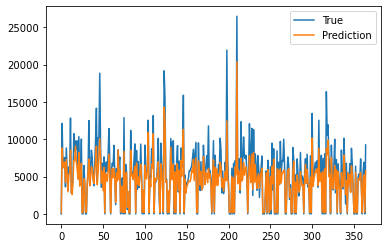

In [49]:
pred_365 = pred[0:365]
y_valid_365 = y_valid[0:365]

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test_365, label='True')
ax.plot(pred_365, label='Prediction')

ax.legend()
plt.show()